In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
from google.colab import files
uploaded = files.upload()


Saving sonardata.csv to sonardata.csv


In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data')

In [0]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [0]:
df.shape #60 input values y el classifier

(207, 61)

In [0]:
X = df.iloc[:, 0:60]
X.shape

(207, 60)

In [0]:
Y = df.iloc[:,60]
Y.shape

Y = [1 if x == 'M' else 0 for x in Y] #1 para minerales, 0 para rocas

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [0]:
print(x_train[0].shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60,)
(165,)
(42, 60)
(42,)


In [0]:
i = Input(shape=x_train[0].shape)
x = Dense(128, activation='relu',kernel_regularizer='l2')(i)
x = Dropout(0.1)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

opt = tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000)

Epoch 1/1000
6/6 [==============================] - 0s 35ms/step - loss: 1.3533 - accuracy: 0.6788 - val_loss: 0.9831 - val_accuracy: 0.8095
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.8722 - accuracy: 0.8545 - val_loss: 0.8272 - val_accuracy: 0.8571
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.6318 - accuracy: 0.9333 - val_loss: 0.8486 - val_accuracy: 0.7857
Epoch 4/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.5111 - accuracy: 0.9333 - val_loss: 0.6511 - val_accuracy: 0.8571
Epoch 5/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4195 - accuracy: 0.9576 - val_loss: 0.5720 - val_accuracy: 0.8333
Epoch 6/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3338 - accuracy: 0.9879 - val_loss: 0.5526 - val_accuracy: 0.8095
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.9879 - val_loss: 0.4829 - val_accuracy: 0.8571
Epoch 8/1000
6/6 [=

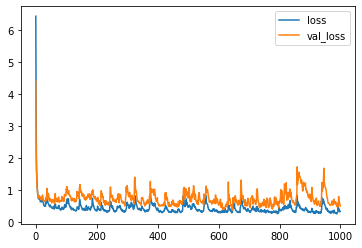

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

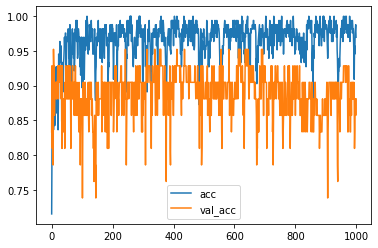

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()